### Happiness Index EDA & Visualizations

In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('DataSets/Happiness/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Happiness/2018.csv
DataSets/Happiness/2019.csv


In [52]:
df = pd.read_csv('DataSets/Happiness/2019.csv') #Import the CSV file to the notebook.

In [53]:
df.drop(columns = ['Overall rank'], inplace = True) #Dropping the Rank column since there is already a Index column.

In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB
None


In [55]:
df.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### We have 156 rows in this dataset and none of them are NaN.

In [56]:
print(df.describe()) #Since all of the datas are numerical datas, we can gather a lot of information about our dataset using describe.

            Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.392571    0.184846                   0.110603  
std                        0.143289    0.095254                   

### Correlation between datas.

### This dataset can give us a lot of information with correlation since all of the columns are numerical datas.

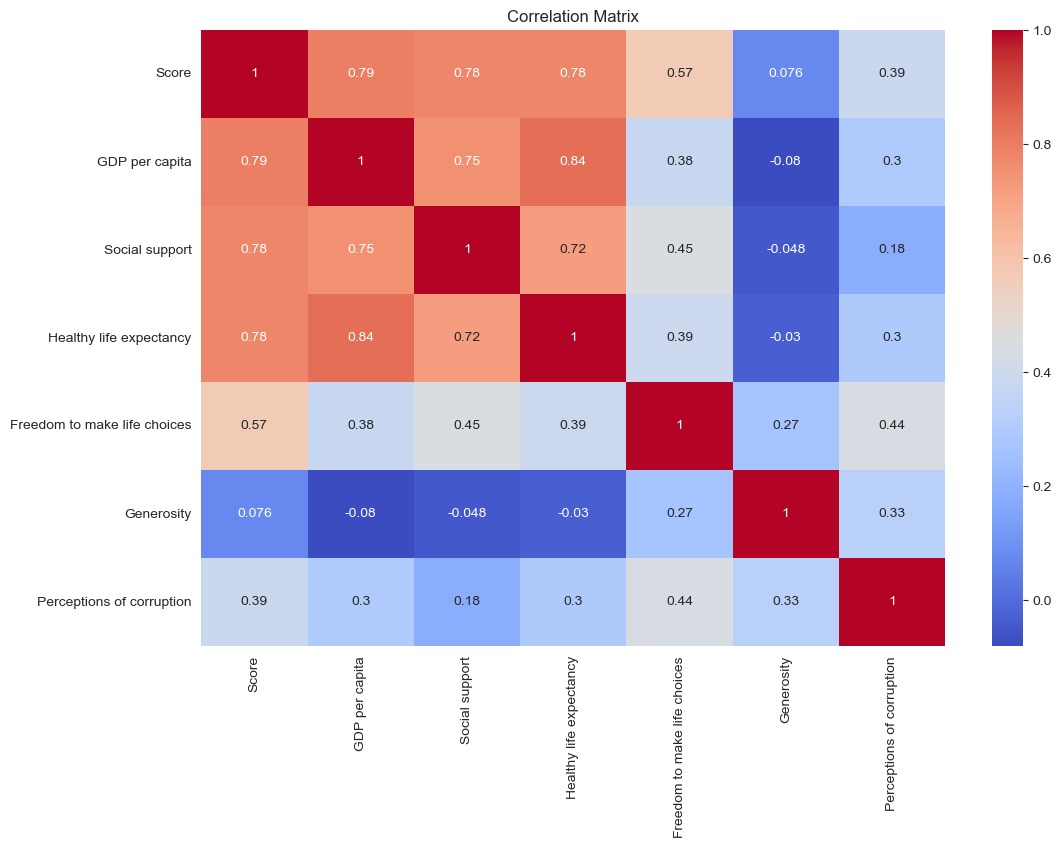

In [57]:
#Visualization of the Correlation Heat Map.
plt.figure(figsize =(12,8)) #Sets the size of Plot.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') #Creates a heatmap. df.corr() = creates a corr table of the dataframe.
plt.title('Correlation Matrix')
plt.show()

### According to the Heat Map:

- We can say that GDP Per Capita has a noticable affection on Health Life Expectancy and Social Support.
- Generosity doesn't have much affection on the Happiness Index Score and so other inputs.

In [58]:
threshold = sum(df.Score)/len(df.Score) #Calculates mean Score.
print('The average score of Happiness Index is: ',threshold)
df["Happiness Level"] = ["Happy" if i > threshold else "Unhappy" for i in df.Score] #Creates a new column 'Happiness Level' and specifies a condition.
print(df['Happiness Level'].value_counts())

The average score of Happiness Index is:  5.407096153846153
Unhappy    79
Happy      77
Name: Happiness Level, dtype: int64


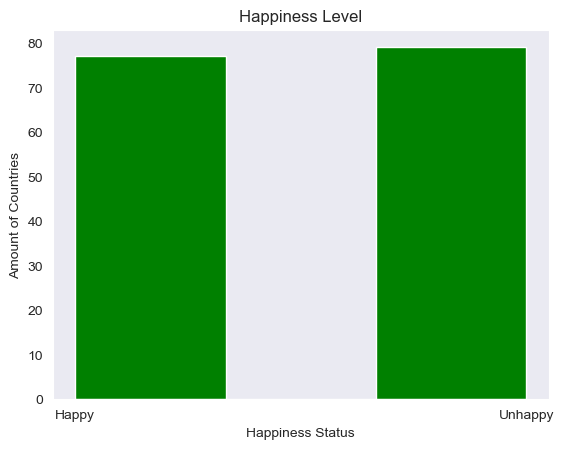

In [59]:
plt.hist(df['Happiness Level'], bins = 3,color = 'Green')
plt.grid()
plt.title('Happiness Level')
plt.xlabel('Happiness Status')
plt.ylabel('Amount of Countries')
plt.show()

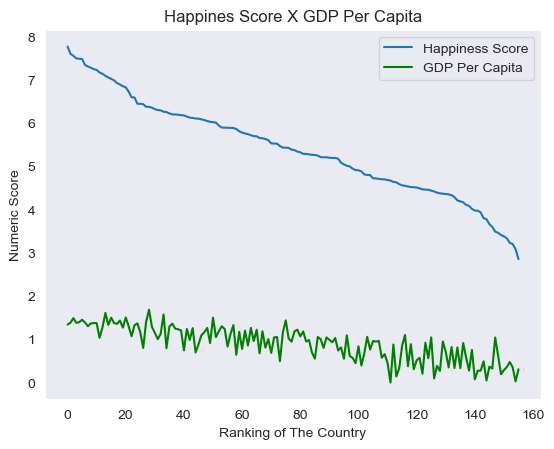

In [60]:
df['Score'].plot(kind = 'line', label = 'Happiness Score')
df['GDP per capita'].plot(kind = 'line', label = 'GDP Per Capita', color = 'green')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('Ranking of The Country')
plt.ylabel('Numeric Score')
plt.title('Happines Score X GDP Per Capita')
plt.show()